In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None)

df.columns = ['review', 'score']
df['review'] = df['review'].str.lower()
#score - bad is 0, good is 1

#turning score column into boolean - where True is BAD.
#Don't run this column more than once!!! otherwise everything False
df['score'] = (df['score'] == 0)

#chose these keywords based off of words that you might find most likely to be in a bad yelp review
keywords = ['bad', 'nasty', 'horrible', 'terrible', 
            'not', 'never', 'long', 'no', "didn't", 
            "wouldn't",'slow', 'disgusted', 'worst', 
            'poor', 'mess', 'underwhelming']

for key in keywords:
    df[str(key)] = df.review.str.contains('' + str(key) + ' ', case=False)

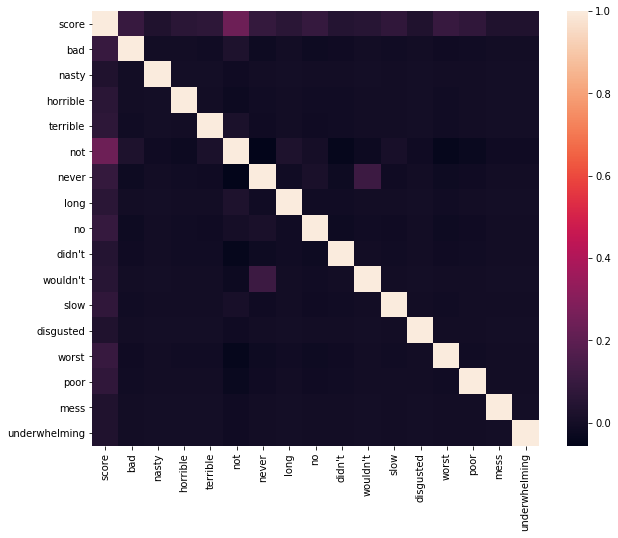

In [3]:
#making sure that my features are relatively independent of eachother.
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

plt.show()

In [4]:
#training data
data = df[keywords]
target = df['score']

In [8]:
#since the data is binary, import Bernoulli class
from sklearn.naive_bayes import BernoulliNB

#instantiate our model and store it in a new variable
bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, storing the result in a new variable
y_pred = bnb.predict(data)

#displaying results
print('Number of mislabeled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))

print('{}% mislabeled'.format((target != y_pred).sum()/data.shape[0]*100))

# Calculate the accuracy of your model here.
print('Number of correctly identified points out of a total {} points : {}'.format(
    data.shape[0], 
    (target == y_pred).sum()
))

print('Accuracy = {:.4}%'.format((target == y_pred).sum()/data.shape[0]*100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

Number of mislabeled points out of a total 1000 points : 348
34.8% mislabeled
Number of correctly identified points out of a total 1000 points : 652
Accuracy = 65.2%


array([[466,  34],
       [314, 186]])

314 is the not catching a bad review and lebeling it as a good review. 

# Testing the other data

In [10]:
df1 = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', delimiter='\t', header=None)

df1.columns = ['review', 'score']
df1['review'] = df1['review'].str.lower()
#score - bad is 0, good is 1

#turning score column into boolean - where True is BAD.
#Don't run this column more than once!!! otherwise everything False
df1['score'] = (df1['score'] == 0)

#chose these keywords based off of words that you might find most likely to be in a bad yelp review
keywords1 = ['bad', 'nasty', 'horrible', 'terrible', 
            'not', 'never', 'long', 'no', "didn't", 
            "wouldn't",'slow', 'disgusted', 'worst', 
            'poor', 'mess', 'underwhelming']

for key in keywords1:
    df1[str(key)] = df1.review.str.contains('' + str(key) + ' ', case=False)

data1 = df1[keywords]   
target1 = df1['score']  
    
#classify, storing the result in a new variable
y_pred1 = bnb.predict(data1)

#displaying results
print('Number of mislabeled points out of a total {} points : {}'.format(data1.shape[0], (target1 != y_pred1).sum()))

print('{}% mislabeled'.format((target1 != y_pred1).sum()/data1.shape[0]*100))

# Calculate the accuracy of your model here.
print('Number of correctly identified points out of a total {} points : {}'.format(
    data1.shape[0], 
    (target1 == y_pred1).sum()
))

print('Accuracy = {:.4}%'.format((target1 == y_pred1).sum()/data1.shape[0]*100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target1, y_pred1)

Number of mislabeled points out of a total 748 points : 284
37.967914438502675% mislabeled
Number of correctly identified points out of a total 748 points : 464
Accuracy = 62.03%


array([[347,  39],
       [245, 117]])

In [12]:
df2 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', delimiter='\t', header=None)

df2.columns = ['review', 'score']
df2['review'] = df2['review'].str.lower()
#score - bad is 0, good is 1

#turning score column into boolean - where True is BAD.
#Don't run this column more than once!!! otherwise everything False
df2['score'] = (df2['score'] == 0)

#chose these keywords based off of words that you might find most likely to be in a bad yelp review
keywords2 = ['bad', 'nasty', 'horrible', 'terrible', 
            'not', 'never', 'long', 'no', "didn't", 
            "wouldn't",'slow', 'disgusted', 'worst', 
            'poor', 'mess', 'underwhelming']

for key in keywords2:
    df2[str(key)] = df2.review.str.contains('' + str(key) + ' ', case=False)

data2 = df2[keywords]   
target2 = df2['score']  
    
#classify, storing the result in a new variable
y_pred2 = bnb.predict(data2)

#displaying results
print('Number of mislabeled points out of a total {} points : {}'.format(data1.shape[0], (target2 != y_pred2).sum()))

print('{}% mislabeled'.format((target2 != y_pred2).sum()/data2.shape[0]*100))

# Calculate the accuracy of your model here.
print('Number of correctly identified points out of a total {} points : {}'.format(
    data2.shape[0], 
    (target2 == y_pred2).sum()
))

print('Accuracy = {:.4}%'.format((target2 == y_pred2).sum()/data2.shape[0]*100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred2)

Number of mislabeled points out of a total 748 points : 365
36.5% mislabeled
Number of correctly identified points out of a total 1000 points : 635
Accuracy = 63.5%


array([[466,  34],
       [331, 169]])